In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


In [8]:
!pip uninstall -y scikit-learn sklearn imbalanced-learn
!pip install --no-cache-dir --force-reinstall \
  "scikit-learn==1.7.2" "imbalanced-learn==0.14.0" \
  "numpy==1.26.4" "scipy==1.13.0"

Found existing installation: scikit-learn 1.7.2
Uninstalling scikit-learn-1.7.2:
  Successfully uninstalled scikit-learn-1.7.2
Found existing installation: imbalanced-learn 0.14.0
Uninstalling imbalanced-learn-0.14.0:
  Successfully uninstalled imbalanced-learn-0.14.0


You can safely remove it manually.


   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 8.7/8.7 MB 67.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   ---------------------------------------- 15.5/15.5 MB 88.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/45.9 MB ? eta -:--:--
   -------------- ------------------------- 17.0/45.9 MB 82.6 MB/s eta 0:00:01
   ------------------------------ --------- 34.6/45.9 MB 81.6 MB/s eta 0:00:01
   ---------------------------------------- 45.9/45.9 MB 83.6 MB/s eta 0:00:00
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.6.0
    Uninstalling threadpoolctl-3.6.0:
      Successfully uninstalled threadpoolctl-3.6.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: joblib
    Found existing installation: job

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


# Discrete Modeling

## Data

In [9]:
cont_path = './cont_df.csv'
df = pd.read_csv(cont_path, low_memory=False)

In [10]:
X = df.drop(columns=[c for c in ['sha256', 'type'] if c in df.columns])
y = df['type'].apply(lambda v: 0 if v == 0 else 1) if df['type'].nunique() != 2 else df['type']

c:\Users\chaoa\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\chaoa\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Total features available: 142
Top 20 features (for linear models): ['machine', 'magic', 'sizeofoptionalheader', 'pdata_characteristics', 'minorsubsystemversion', 'imagebase', 'subsystem', 'bss_characteristics', 'timedatestamp', 'majorsubsystemversion', 'idata_characteristics', 'tls_characteristics', 'majoroperatingsystemversion', 'majorlinkerversion', 'reloc_characteristics', 'sizeofstackreserve', 'numberofsections', 'pdata_virtualaddress', 'pdata_pointertorawdata', 'minorlinkerversion']
All 142 features (for tree-based models - they handle feature selection internally)
Top 25 features (for other models): ['machine', 'magic', 'sizeofoptionalheader', 'pdata_characteristics', 'minorsubsystemversion', 'imagebase', 'subsystem', 'bss_characteristics', 'timedatestamp', 'majorsubsystemversion', 'idata_characteristics', 'tls_characteristics', 'majoroperatingsystemversion', 'majorlinkerversion', 'reloc_characteristics', 'sizeofstackreserve', 'numberofsections', 'pdata_virtualaddress', 'pdata_po

c:\Users\chaoa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Best parameters for LinearSVM: {'clf__C': 10.0, 'clf__loss': 'hinge', 'clf__max_iter': 3000, 'clf__tol': 0.0001, 'pca__n_components': 0.9}
Best CV score: 0.6445
Training time: 3.94 seconds (0.07 minutes)


--- LinearSVM Best Model Results ---
PR_AUC: 0.9890
ROC_AUC: 0.9109
Accuracy: 0.7918

Confusion Matrix:
[[ 251   31]
 [ 891 3255]]

Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.89      0.35       282
           1       0.99      0.79      0.88      4146

    accuracy                           0.79      4428
   macro avg       0.61      0.84      0.61      4428
weighted avg       0.94      0.79      0.84      4428


=== Grid Search for RBF_SVM ===
Using 50 features (other model)
Starting grid search for RBF_SVM...
Fitting 3 folds for each of 1 candidates, totalling 3 fits

Best parameters for RBF_SVM: {'clf__C': 10.0, 'clf__gamma': 'auto', 'clf__tol': 0.0001, 'pca__n_components': 0.95}
Best CV score: 0.8922
Training time

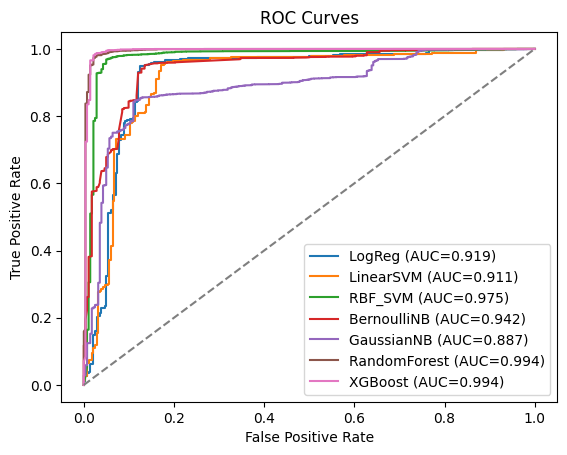

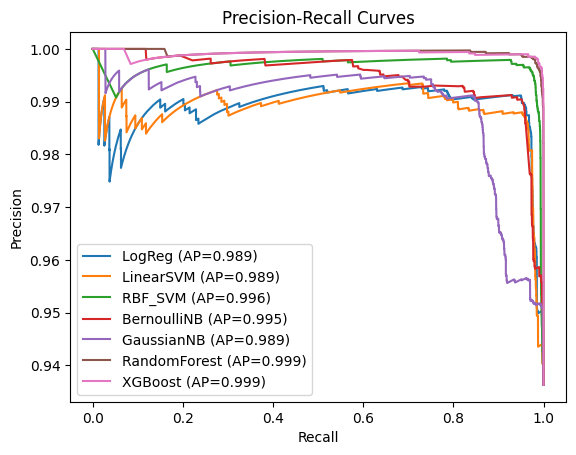

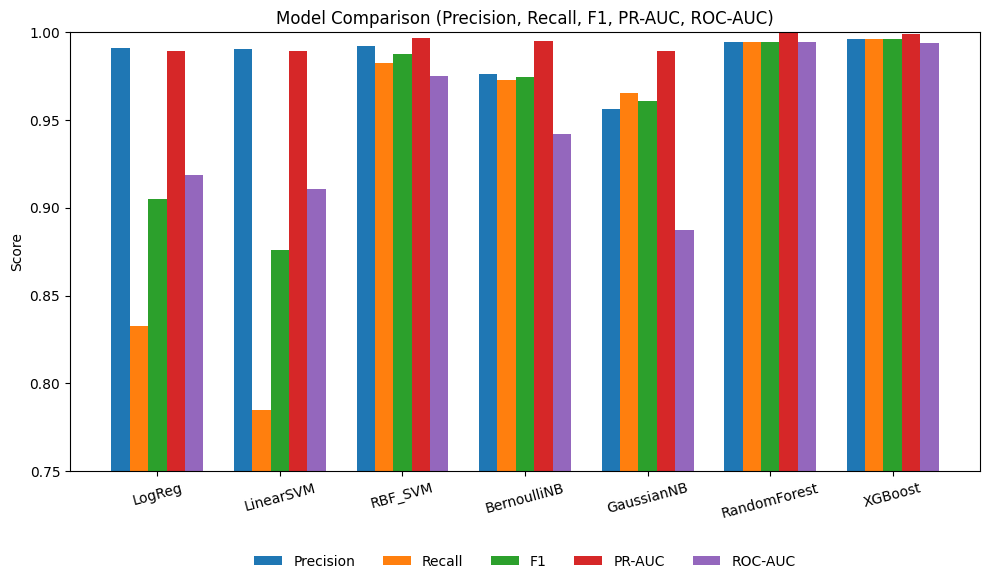

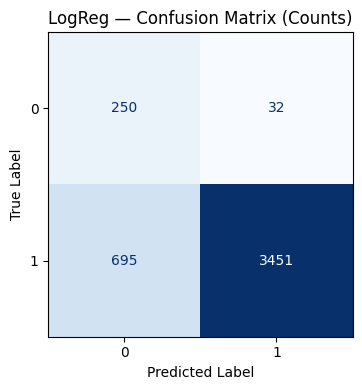

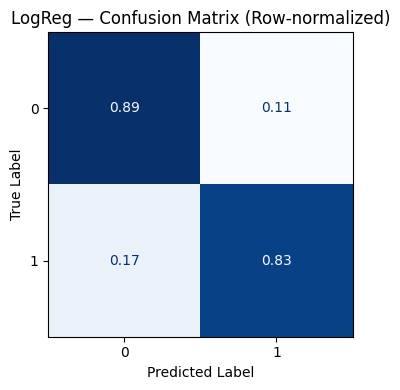

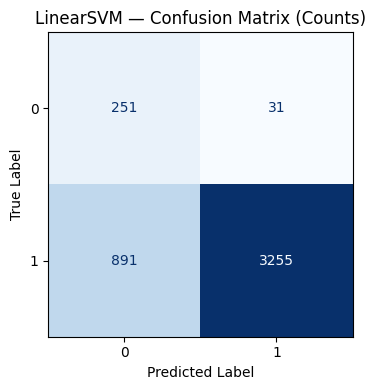

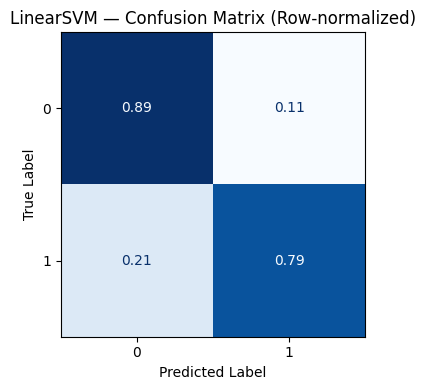

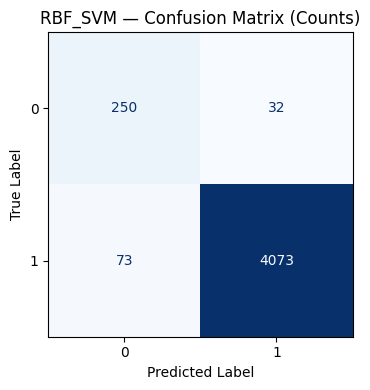

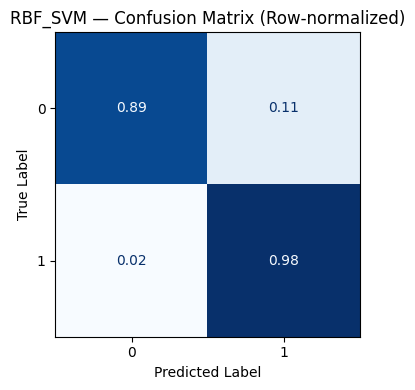

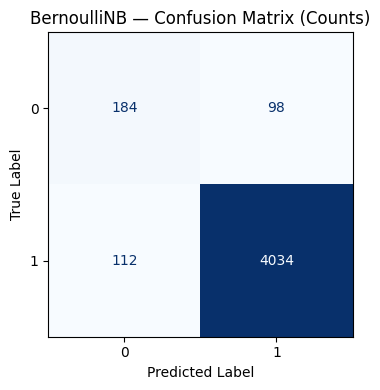

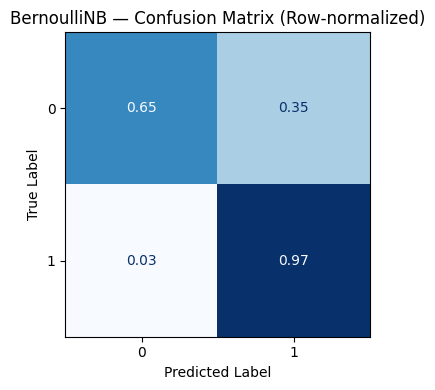

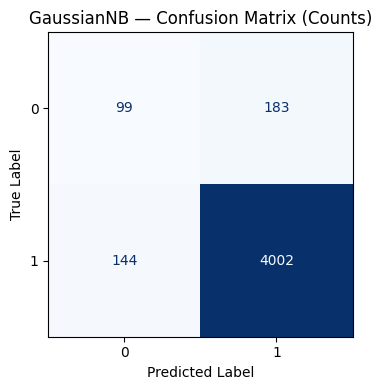

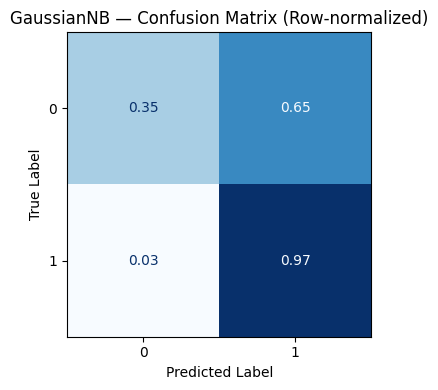

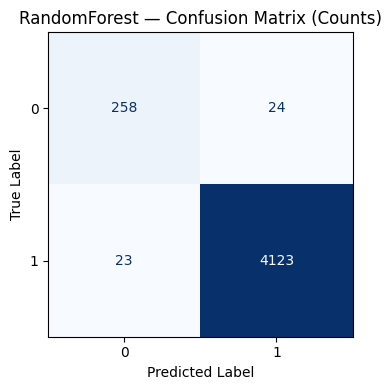

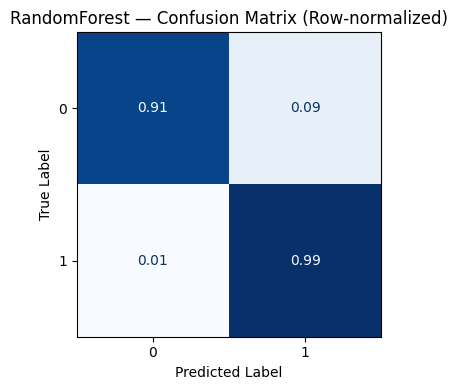

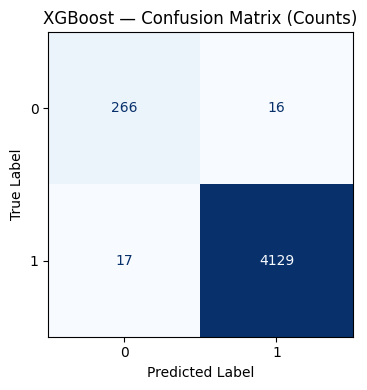

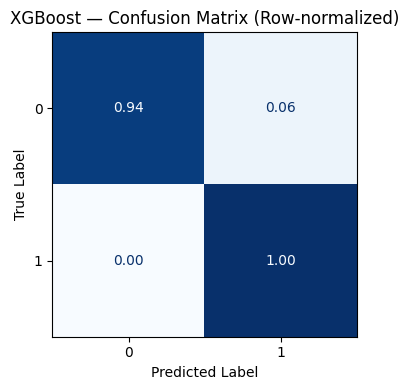


=== Model Results (Best from Grid Search) ===
Total binary columns in dataset: 9
Model        | PR-AUC   | ROC-AUC  | Accuracy | Precision | Recall  | F1     | Time (min)
----------------------------------------------------------------------------------------------------
LogReg       | 0.9892   | 0.9188   | 0.836    | 0.991     | 0.832   | 0.905  | 0.08      
LinearSVM    | 0.9890   | 0.9109   | 0.792    | 0.991     | 0.785   | 0.876  | 0.07      
RBF_SVM      | 0.9964   | 0.9749   | 0.976    | 0.992     | 0.982   | 0.987  | 0.50      
BernoulliNB  | 0.9950   | 0.9422   | 0.953    | 0.976     | 0.973   | 0.975  | 0.02      
GaussianNB   | 0.9894   | 0.8873   | 0.926    | 0.956     | 0.965   | 0.961  | 0.07      
RandomForest | 0.9994   | 0.9943   | 0.989    | 0.994     | 0.994   | 0.994  | 0.20      
XGBoost      | 0.9992   | 0.9938   | 0.993    | 0.996     | 0.996   | 0.996  | 0.34      

Total training time: 76.78 seconds (1.28 minutes)


In [11]:
# ==== CORE SETUP (threads, imports) ===========================================
import os, multiprocessing
thread_count = multiprocessing.cpu_count()
os.environ['OPENBLAS_NUM_THREADS']=str(thread_count)
os.environ['MKL_NUM_THREADS']=str(thread_count)
os.environ['NUMEXPR_NUM_THREADS']=str(thread_count)
os.environ['OMP_NUM_THREADS']=str(thread_count)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin, clone
from sklearn.preprocessing import FunctionTransformer, StandardScaler, Binarizer
from sklearn.feature_selection import SelectKBest, chi2  # (not used here, kept if you want to test later)
from sklearn.decomposition import PCA
from sklearn.metrics import (
    accuracy_score, precision_recall_curve, roc_curve, average_precision_score, roc_auc_score,
    precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE, SMOTENC

# Optional XGBoost
try:
    from xgboost import XGBClassifier
    HAS_XGB = True
except Exception:
    HAS_XGB = False

# ==== UTILS ===================================================================
def get_scores(est, X_test):
    """Use predict_proba if available; else decision_function; else predictions as float."""
    if hasattr(est, "predict_proba"):
        return est.predict_proba(X_test)[:, 1]
    elif hasattr(est, "decision_function"):
        return est.decision_function(X_test)
    else:
        return est.predict(X_test).astype(float)

def detect_binary_columns(df: pd.DataFrame):
    """Return list of column names that are strictly binary {0,1} (ignoring NaNs)."""
    bin_cols = []
    for c in df.columns:
        vals = pd.unique(df[c].dropna())
        # allow ints/floats but only {0,1}
        if len(vals) <= 2 and set(vals).issubset({0, 1, 0.0, 1.0}):
            bin_cols.append(c)
    return bin_cols

# ==== DATA ====================================================================
# Select features using Pearson correlation (before train/test split)
# Different models will use different numbers of features
X_all = X.copy()
y_all = y.copy()

# Calculate Pearson correlations with target
correlations = X_all.corrwith(y_all)
correlations_abs = correlations.abs()

# Get all features sorted by absolute correlation
all_features_sorted = correlations_abs.sort_values(ascending=False).index.tolist()

# Define feature sets for different model types:
# - Linear models (LogReg, LinearSVM): fewer features (15-20) to prevent overfitting
# - Tree-based (RandomForest, XGBoost): ALL features - they have built-in feature selection
# - Other models: moderate set (20-30)

linear_features = all_features_sorted[:20]  # Top 20 for linear models
tree_features = all_features_sorted  # ALL features for tree-based models (they select internally)
moderate_features = all_features_sorted[:50]  # Top 50 for other models

print(f"Total features available: {len(X_all.columns)}")
print(f"Top 20 features (for linear models): {linear_features}")
print(f"All {len(tree_features)} features (for tree-based models - they handle feature selection internally)")
print(f"Top 25 features (for other models): {moderate_features[:20]}... (showing first 20)")
print("\n")

# Store feature sets for different model types
feature_sets = {
    'linear': linear_features,      # LogReg, LinearSVM
    'tree': tree_features,          # RandomForest, XGBoost - use all features
    'moderate': moderate_features    # GaussianNB, BernoulliNB, RBF_SVM
}

# For train/test split, use all available features (we'll subset per model later)
y = y_all
X_train_all, X_test_all, y_train, y_test = train_test_split(
    X_all, y, test_size=0.15, stratify=y, random_state=42
)

# Detect binary (categorical) columns on training data for SMOTENC
# Use X_train_all to detect binary columns across all features
bin_cols = detect_binary_columns(X_train_all)
cont_cols = [c for c in X_train_all.columns if c not in bin_cols]
# Note: cat_idx will be recalculated per model based on selected features

# ==== PIPELINE TEMPLATES ======================================================
# Common steps for most models: SMOTE/SMOTENC -> StandardScaler -> PCA(0.95) -> clf
def make_pca_pipe(clf, sampler):
    return ImbPipeline(steps=[
        ('smote', sampler),                               # oversample train fold only
        ('scaler', StandardScaler(with_mean=True)),
        ('pca', PCA(n_components=0.95, svd_solver='full', random_state=42)),
        ('clf', clf),
    ])

# Special branch for BernoulliNB: SMOTE/SMOTENC -> StandardScaler -> Binarizer -> BernoulliNB
# (BernoulliNB expects binary inputs; binarize standardized features around 0)
def make_bnb_pipe(clf, sampler):
    return ImbPipeline(steps=[
        ('smote', sampler),
        ('scaler', StandardScaler(with_mean=True)),
        ('bin', Binarizer(threshold=0.0)),               # convert to {0,1} by sign
        ('clf', clf),
    ])

# ==== BASE ESTIMATORS =========================================================
base_estimators = {
    "LogReg": LogisticRegression(
        class_weight='balanced', random_state=42
    ),
    "LinearSVM": LinearSVC(
        class_weight='balanced', dual='auto', random_state=42
    ),
    "RBF_SVM": SVC(
        kernel='rbf', class_weight='balanced', probability=True, random_state=42
    ),
    "BernoulliNB": BernoulliNB(),
    "GaussianNB": GaussianNB(),
    "RandomForest": RandomForestClassifier(
        class_weight='balanced_subsample', random_state=42, n_jobs=thread_count
    )
}

if HAS_XGB:
    base_estimators["XGBoost"] = XGBClassifier(
        n_jobs=thread_count, random_state=42, tree_method='hist',
        eval_metric='aucpr', scale_pos_weight=1.0
    )

# ==== GRID SEARCH PARAMETERS ==================================================
# All grids designed to keep total fits < 100 (with CV=3, max ~33 combinations per model)
param_grids = { # {'clf__C': 10.0, 'clf__fit_intercept': True, 'clf__max_iter': 3000, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs', 'clf__tol': 0.0001, 'pca__n_components': 0.9}
    "LogReg": {
        'clf__C': [10.0],
        'clf__penalty': ['l2'],
        'clf__solver': ['lbfgs'],
        'clf__tol': [1e-4],
        'clf__max_iter': [3000],
        'clf__fit_intercept': [True],
        'pca__n_components': [0.90]
    }, #{'clf__var_smoothing': 1e-09, 'pca__n_components': 0.9}
    "GaussianNB": {
        'clf__var_smoothing': [1e-9],
        'pca__n_components': [0.90]
    }, # {'bin__threshold': 0.0, 'clf__alpha': 0.1, 'clf__fit_prior': False}
    "BernoulliNB": {
        'clf__alpha': [0.1],
        'clf__fit_prior': [False],
        'bin__threshold': [0.0]
    },
    "LinearSVM": {
        'clf__C': [10.0],
        'clf__tol': [1e-4],
        'clf__loss': ['hinge'],
        'clf__max_iter': [3000],
        'pca__n_components': [0.90]
    }, # {'clf__C': 10.0, 'clf__loss': 'hinge', 'clf__max_iter': 3000, 'clf__tol': 0.0001, 'pca__n_components': 0.9}
    "RBF_SVM": {
        'clf__C': [10.0],
        'clf__gamma': ['auto'],
        'clf__tol': [1e-4],
        'pca__n_components': [0.95]
    }, # {'clf__C': 10.0, 'clf__gamma': 'auto', 'clf__tol': 0.0001, 'pca__n_components': 0.95}
    "RandomForest": {
        'clf__n_estimators': [200],
        'clf__max_depth': [20],
        'clf__min_samples_split': [2],
        'clf__min_samples_leaf': [1],
        'clf__max_features': ['log2'],
        'pca__n_components': [0.95]
    } # {'clf__max_depth': 20, 'clf__max_features': 'log2', 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 200, 'pca__n_components': 0.95}
}
# {'clf__learning_rate': 0.2, 'clf__max_depth': 8, 'clf__n_estimators': 600, 'clf__reg_lambda': 1.0, 'clf__subsample': 0.8, 'pca__n_components': 0.95}
if HAS_XGB:
    param_grids["XGBoost"] = {
        'clf__n_estimators': [600],
        'clf__learning_rate': [0.2],
        'clf__max_depth': [8],
        'clf__subsample': [0.8],
        'clf__reg_lambda': [1.0],
        'pca__n_components': [0.95]
    }

# ==== GRID SEARCH + EVAL ======================================================
import time
results = {}
roc_curves, pr_curves, fitted_pipes, cms = {}, {}, {}, {}
best_models = {}

print("Starting Grid Search for all models...\n")

for name, estimator in base_estimators.items():
    print(f"=== Grid Search for {name} ===")
    
    # Select appropriate feature set based on model type
    if name in ["LogReg", "LinearSVM"]:
        selected_features = feature_sets['linear']
        print(f"Using {len(selected_features)} features (linear model)")
    elif name in ["RandomForest", "XGBoost"]:
        selected_features = feature_sets['tree']
        print(f"Using {len(selected_features)} features (tree-based model)")
    else:
        selected_features = feature_sets['moderate']
        print(f"Using {len(selected_features)} features (other model)")
    
    # Subset features for this model
    X_train = X_train_all[selected_features]
    X_test = X_test_all[selected_features]
    
    # Recalculate binary column indices for this feature subset
    bin_cols_subset = [c for c in bin_cols if c in selected_features]
    cat_idx = [X_train.columns.get_loc(c) for c in bin_cols_subset if c in X_train.columns]
    
    # Create sampler for this model's feature set
    use_smote_nc_model = len(cat_idx) > 0
    sampler_model = SMOTENC(categorical_features=cat_idx, sampling_strategy=1/3, random_state=42) if use_smote_nc_model \
                    else SMOTE(sampling_strategy=1/3, random_state=42)
    
    # Create pipeline - special handling for BernoulliNB
    if name == "BernoulliNB":
        pipe = make_bnb_pipe(estimator, sampler_model)
    else:
        pipe = make_pca_pipe(estimator, sampler_model)
    
    # Perform grid search with timing
    start_time = time.time()
    grid_search = GridSearchCV(
        pipe,
        param_grids[name],
        scoring='f1_macro',
        cv=3,
        n_jobs=-1,
        verbose=2
    )
    
    print(f"Starting grid search for {name}...")
    grid_search.fit(X_train, y_train)
    elapsed_time = time.time() - start_time
    best_models[name] = grid_search.best_estimator_
    
    print(f"\nBest parameters for {name}: {grid_search.best_params_}")
    print(f"Best CV score: {grid_search.best_score_:.4f}")
    print(f"Training time: {elapsed_time:.2f} seconds ({elapsed_time/60:.2f} minutes)\n")
    
    # Evaluate best model on test set (use same feature subset)
    fitted_pipes[name] = best_models[name]
    scores = get_scores(best_models[name], X_test)
    ap = average_precision_score(y_test, scores)
    roc_auc = roc_auc_score(y_test, scores)
    preds = (scores >= 0.5).astype(int)
    
    # Curves
    pr_prec, pr_rec, _ = precision_recall_curve(y_test, scores)
    fpr, tpr, _ = roc_curve(y_test, scores)
    pr_curves[name], roc_curves[name] = (pr_rec, pr_prec), (fpr, tpr)
    
    # Confusion matrix
    cm = confusion_matrix(y_test, preds, labels=[0, 1])
    cms[name] = cm
    
    # Metrics
    results[name] = {
        "PR_AUC": ap,
        "ROC_AUC": roc_auc,
        "Accuracy": accuracy_score(y_test, preds),
        "Precision": precision_score(y_test, preds, zero_division=0),
        "Recall": recall_score(y_test, preds, zero_division=0),
        "F1": f1_score(y_test, preds, zero_division=0),
        "Best_Params": grid_search.best_params_,
        "Training_Time": elapsed_time,
        "Sampler": "SMOTENC" if use_smote_nc_model else "SMOTE",
        "BinaryCols": len(bin_cols_subset),
        "N_Features": len(selected_features)
    }
    
    # Print confusion matrix and classification report
    print(f"\n--- {name} Best Model Results ---")
    print(f"PR_AUC: {results[name]["PR_AUC"]:.4f}")
    print(f"ROC_AUC: {results[name]["ROC_AUC"]:.4f}")
    print(f"Accuracy: {results[name]["Accuracy"]:.4f}")
    print(f"\nConfusion Matrix:")
    print(cm)
    print(f"\nClassification Report:")
    print(classification_report(y_test, preds, zero_division=0))
    print("="*80 + "\n")

# ==== PLOTS ===================================================================
# 1) ROC curves
plt.figure()
for name, (fpr, tpr) in roc_curves.items():
    plt.plot(fpr, tpr, label=f'{name} (AUC={results[name]["ROC_AUC"]:.3f})')
plt.plot([0,1],[0,1],'--')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

# 2) PR curves
plt.figure()
for name, (rec, prec) in pr_curves.items():
    plt.plot(rec, prec, label=f'{name} (AP={results[name]["PR_AUC"]:.3f})')
plt.xlabel('Recall'); plt.ylabel('Precision'); plt.title('Precision-Recall Curves')
plt.legend(loc='lower left')
plt.show()

# 3) Comparison bar chart: Precision, Recall, F1, PR-AUC, Accuracy
labels = list(results.keys())
precisions = [results[m]["Precision"] for m in labels]
recalls    = [results[m]["Recall"] for m in labels]
f1s        = [results[m]["F1"] for m in labels]
ap_scores  = [results[m]["PR_AUC"] for m in labels]
rocs = [results[m]["ROC_AUC"] for m in labels]

x = np.arange(len(labels))
w = 0.15  # 5 bars per group

plt.figure(figsize=(10, 6))
plt.bar(x - 2*w, precisions, width=w, label='Precision')
plt.bar(x - w,   recalls,   width=w, label='Recall')
plt.bar(x,       f1s,       width=w, label='F1')
plt.bar(x + w,   ap_scores, width=w, label='PR-AUC')
plt.bar(x + 2*w, rocs, width=w, label='ROC-AUC')

plt.xticks(x, labels, rotation=15)
plt.ylim(0.75, 1.0)
plt.ylabel('Score')
plt.title('Model Comparison (Precision, Recall, F1, PR-AUC, ROC-AUC)')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=5, frameon=False)
plt.tight_layout()
plt.show()

# 4) Confusion Matrices — plotted separately for each model
for name, cm in cms.items():
    # Raw counts
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    fig, ax = plt.subplots(figsize=(4, 4))
    disp.plot(ax=ax, cmap='Blues', colorbar=False)
    plt.title(f'{name} — Confusion Matrix (Counts)')
    plt.xlabel('Predicted Label'); plt.ylabel('True Label')
    plt.tight_layout(); plt.show()

    # Row-normalized
    with np.errstate(all='ignore'):
        cm_norm = cm / cm.sum(axis=1, keepdims=True)
        cm_norm = np.nan_to_num(cm_norm)
    disp_norm = ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=[0, 1])
    fig, ax = plt.subplots(figsize=(4, 4))
    disp_norm.plot(ax=ax, cmap='Blues', colorbar=False, values_format='.2f')
    plt.title(f'{name} — Confusion Matrix (Row-normalized)')
    plt.xlabel('Predicted Label'); plt.ylabel('True Label')
    plt.tight_layout(); plt.show()

# ==== PRINT SUMMARY TABLE =====================================================
print("\n=== Model Results (Best from Grid Search) ===")
print(f"Total binary columns in dataset: {len(bin_cols)}")
print(f"{'Model':<12} | {'PR-AUC':<8} | {'ROC-AUC':<8} | {'Accuracy':<8} | {'Precision':<9} | {'Recall':<7} | {'F1':<6} | {'Time (min)':<10}")
print("-" * 100)
for name, mets in results.items():
    print(
        f"{name:<12} | "
        f"{mets['PR_AUC']:<8.4f} | "
        f"{mets['ROC_AUC']:<8.4f} | "
        f"{mets['Accuracy']:<8.3f} | "
        f"{mets['Precision']:<9.3f} | "
        f"{mets['Recall']:<7.3f} | "
        f"{mets['F1']:<6.3f} | "
        f"{mets['Training_Time']/60:<10.2f}"
    )

# Print total time
total_time = sum(mets['Training_Time'] for mets in results.values())
print(f"\nTotal training time: {total_time:.2f} seconds ({total_time/60:.2f} minutes)")
